In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from math import sqrt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Heart Disease.csv')

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [5]:
df.isnull().values.sum()

0

In [6]:
df.value_counts('HeartDisease')

HeartDisease
No     292422
Yes     27373
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [8]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [9]:
df.shape

(319795, 18)

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

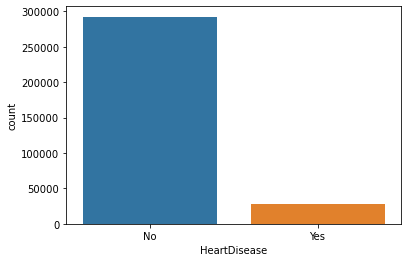

In [10]:
sns.countplot(df['HeartDisease'])

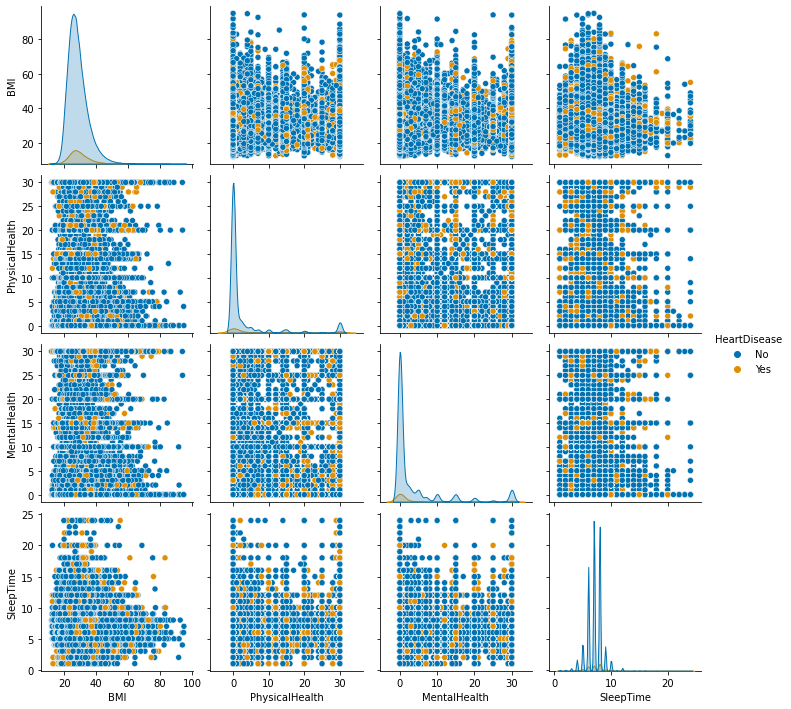

In [11]:
sns.pairplot(hue= 'HeartDisease', data = df, palette = 'colorblind')

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()

In [14]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [15]:
from pandas.core.dtypes.common import is_numeric_dtype


for column in df.columns:
    if is_numeric_dtype(df[column]):
       continue
    else:
        df[column] = le.fit_transform(df[column])

In [16]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [17]:
x = df.drop('HeartDisease',axis=1)

In [18]:
y = df['HeartDisease']

In [19]:
x.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [20]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: HeartDisease, dtype: int32

<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

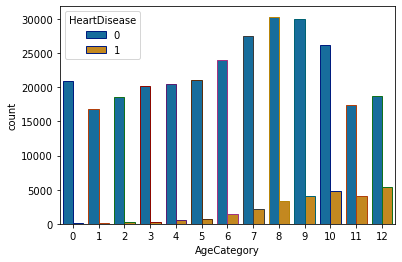

In [21]:
sns.countplot(x='AgeCategory', hue= 'HeartDisease', data = df, palette = 'colorblind', edgecolor = sns.color_palette('dark'))

In [22]:
df.corr()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.070040,0.233432,0.034854,0.168553,-0.100030,-0.011062,0.008327,0.041444,0.145197,0.093317
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.026940,-0.004744,-0.037424,0.202472,-0.150616,0.035932,-0.051822,0.092345,0.050768,-0.033644
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.085052,0.128331,0.065499,0.053847,-0.097174,0.020625,-0.030336,0.024149,0.034920,0.033977
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,0.004200,-0.059528,0.036702,-0.057372,0.017487,0.001629,-0.005065,-0.002202,-0.028280,-0.005702
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,-0.003091,0.137822,-0.003956,0.101518,-0.079455,-0.009335,0.011900,0.038866,0.091167,0.048116
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,-0.040904,0.110763,-0.000847,0.151361,-0.232283,-0.035703,-0.061387,0.117907,0.142197,0.041700
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.100058,-0.155506,-0.014491,0.032945,-0.095808,-0.004412,-0.119717,0.114008,0.037281,-0.033412
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,-0.068860,0.243263,-0.015831,0.205502,-0.278524,-0.043552,-0.022216,0.103222,0.153064,0.064840
Sex,0.070040,0.026940,0.085052,0.004200,-0.003091,-0.040904,-0.100058,-0.068860,1.000000,-0.067478,0.018855,-0.013456,0.048247,-0.010283,-0.015704,-0.069191,-0.009084,0.013434
AgeCategory,0.233432,-0.004744,0.128331,-0.059528,0.137822,0.110763,-0.155506,0.243263,-0.067478,1.000000,0.163090,0.193745,-0.121687,0.044427,0.104953,-0.058108,0.123190,0.263537


<AxesSubplot:>

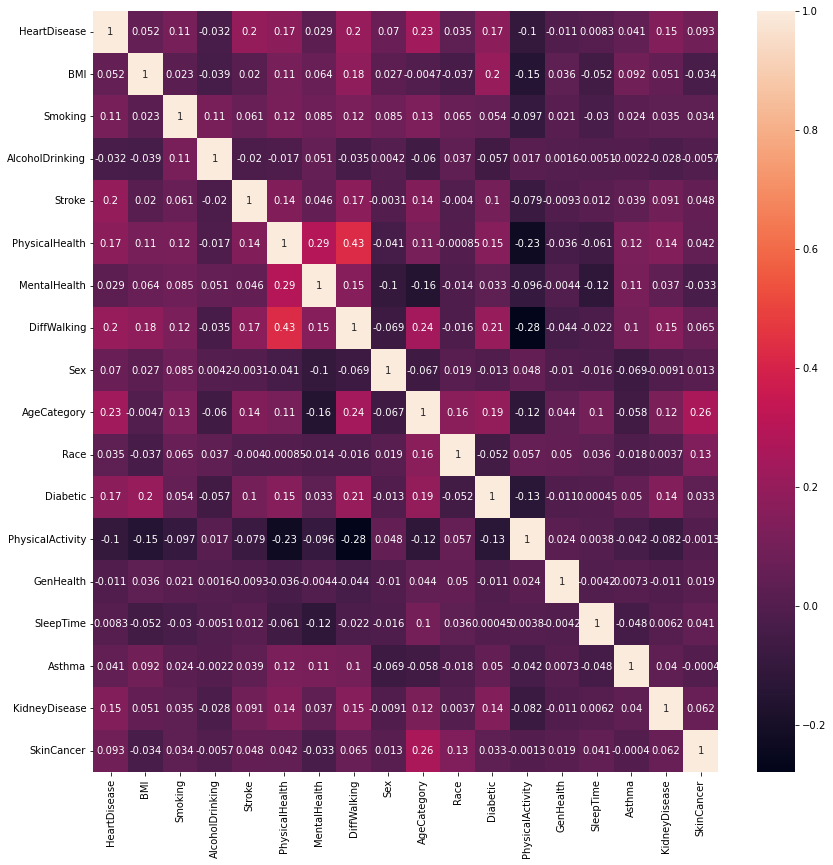

In [23]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),annot=True)

# Sampling

In [24]:
from imblearn.combine import SMOTETomek

In [25]:
sm = SMOTETomek(random_state=42)

In [26]:
x,y = sm.fit_resample(x,y)

In [27]:
x.shape

(580436, 17)

In [28]:
y.value_counts() #After sampling

0    290218
1    290218
Name: HeartDisease, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.30, random_state=101) #stratify = y

In [31]:
x.shape, x_train.shape, x_test.shape

((580436, 17), (406305, 17), (174131, 17))

In [32]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score 

In [33]:
#Now applying Logistic Regression, KNN, XgBoost, AdaBoost, Decision Tree, Random Forest

# LogisticRegression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr = LogisticRegression()

In [36]:
lr.fit(x_train,y_train)

LogisticRegression()

In [37]:
lr_pred = lr.predict(x_test)

In [38]:
lr_pred

array([0, 0, 1, ..., 1, 1, 1])

In [39]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.75      0.70      0.73     87419
           1       0.72      0.76      0.74     86712

    accuracy                           0.73    174131
   macro avg       0.74      0.73      0.73    174131
weighted avg       0.74      0.73      0.73    174131



In [40]:
print(confusion_matrix(y_test,lr_pred))

[[61587 25832]
 [20465 66247]]


# Testing data accuracy

In [41]:
print('Accuracy score:', accuracy_score(y_test,lr_pred))

Accuracy score: 0.7341254572706756


In [42]:
print(f1_score(y_test,lr_pred))

0.7410551985278901


In [43]:
lr.predict([[16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1]]) #Predictive Model

array([0])

# Training data accuracy

In [44]:
lr_pred = lr.predict(x_train)

In [45]:
print(accuracy_score(y_train,lr_pred))

0.7356911679649525


# KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn = KNeighborsClassifier()

In [48]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [49]:
knn_pred = knn.predict(x_test)

In [50]:
knn_pred

array([0, 0, 1, ..., 1, 1, 1])

In [51]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83     87419
           1       0.79      0.96      0.86     86712

    accuracy                           0.85    174131
   macro avg       0.87      0.85      0.85    174131
weighted avg       0.87      0.85      0.85    174131



In [52]:
print(confusion_matrix(y_test,knn_pred))

[[64745 22674]
 [ 3503 83209]]


In [53]:
print('Accuracy score:',accuracy_score(y_test,knn_pred))

Accuracy score: 0.8496706502575647


# DecisionTree

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dtc = DecisionTreeClassifier(criterion='entropy',random_state=1)

In [56]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [57]:
dtc_pred = dtc.predict(x_test)

In [58]:
dtc_pred

array([0, 0, 1, ..., 1, 1, 1])

In [59]:
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87     87419
           1       0.86      0.89      0.87     86712

    accuracy                           0.87    174131
   macro avg       0.87      0.87      0.87    174131
weighted avg       0.87      0.87      0.87    174131



In [60]:
print(confusion_matrix(y_test,dtc_pred))

[[74728 12691]
 [ 9644 77068]]


In [61]:
print('Accuracy score:',accuracy_score(y_test,dtc_pred))

Accuracy score: 0.8717344987394547


# RandomForest

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rfc = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=1)

In [64]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)

In [65]:
rfc_pred = rfc.predict(x_test)

In [66]:
rfc_pred 

array([0, 0, 1, ..., 1, 1, 1])

In [67]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90     87419
           1       0.90      0.91      0.90     86712

    accuracy                           0.90    174131
   macro avg       0.90      0.90      0.90    174131
weighted avg       0.90      0.90      0.90    174131



In [68]:
print(confusion_matrix(y_test,rfc_pred))

[[78312  9107]
 [ 8080 78632]]


In [69]:
print('Accuracy score:',accuracy_score(y_test,rfc_pred))

Accuracy score: 0.9012984477203945


# GradientBoosting

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
gb = GradientBoostingClassifier()

In [72]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [73]:
gb_pred = gb.predict(x_test)

In [74]:
gb_pred 

array([0, 0, 1, ..., 0, 1, 1])

In [75]:
print(confusion_matrix(y_test,gb_pred))

[[68637 18782]
 [13830 72882]]


In [76]:
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81     87419
           1       0.80      0.84      0.82     86712

    accuracy                           0.81    174131
   macro avg       0.81      0.81      0.81    174131
weighted avg       0.81      0.81      0.81    174131



In [77]:
print('Accuracy score:',accuracy_score(y_test,gb_pred))

Accuracy score: 0.8127157140313902


# AdaBoost

In [78]:
from sklearn.ensemble import AdaBoostClassifier

In [79]:
ab = AdaBoostClassifier()

In [80]:
ab.fit(x_train,y_train)

AdaBoostClassifier()

In [81]:
ab_pred = ab.predict(x_test)

In [82]:
ab_pred

array([0, 0, 1, ..., 1, 1, 1])

In [83]:
print(classification_report(y_test,ab_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     87419
           1       0.77      0.79      0.78     86712

    accuracy                           0.78    174131
   macro avg       0.78      0.78      0.78    174131
weighted avg       0.78      0.78      0.78    174131



In [84]:
print(confusion_matrix(y_test,ab_pred))

[[67254 20165]
 [18020 68692]]


In [85]:
print('Accuracy score:',accuracy_score(y_test,ab_pred))

Accuracy score: 0.7807110738467016


# xgboost

In [86]:
import xgboost
from xgboost import XGBClassifier

In [87]:
xb = XGBClassifier()

In [88]:
xb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [89]:
xb_pred = xb.predict(x_test)

In [90]:
xb_pred 

array([0, 0, 0, ..., 0, 1, 1])

In [91]:
print(classification_report(y_test,xb_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     87419
           1       0.87      0.86      0.87     86712

    accuracy                           0.87    174131
   macro avg       0.87      0.87      0.87    174131
weighted avg       0.87      0.87      0.87    174131



In [92]:
print(confusion_matrix(y_test,xb_pred))

[[76184 11235]
 [11803 74909]]


In [93]:
print('Accuracy score:',accuracy_score(y_test,xb_pred))

Accuracy score: 0.8676973083483125
